In [1]:
from scipy.stats import ranksums, ttest_ind, rankdata, norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
sns.set_theme(style="ticks", palette="pastel")

In [3]:
raw_data = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='utf-8', skiprows=58, encoding_errors='ignore', index_col=0, low_memory=False)
id_ref_row = pd.DataFrame(raw_data.loc["ID_REF"]).T
data = raw_data.drop("ID_REF")
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [4]:
count_M = (data.loc["Class"] == "M").sum()
count_H = (data.loc["Class"] == "H").sum()
count_M, count_H

(49, 50)

In [5]:
data_without_incomplete_genes = data.dropna()
data_without_incomplete_genes

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [6]:
transposed_data_frame_without_incomplete_genes = data_without_incomplete_genes.T
transposed_data_frame_without_incomplete_genes.reset_index(inplace=True, drop=True)

<b>Question 3:</b>

a.<br>
1. <b>How many genes profiled?</b><br>There are 54675 profiled genes in described in the dataset.<br>
2. <b>How many samples (subjects/patients) in total?</b><br>There are 99 samples (subjects/patients) in total.<br>
3. <b>How many samples in each class?</b><br>There are 49 samples in class "M" and 50 samples in class "H".<br>
4. <b>If there are missing values, then remove the entire row (gene) from the data matrix.
How many rows left now?</b><br>After removing the rows with the missing values - there were left 54629 rows in the dataframe which represent 54628 genes.<br> 
5. <b>Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.</b><br>Solution:

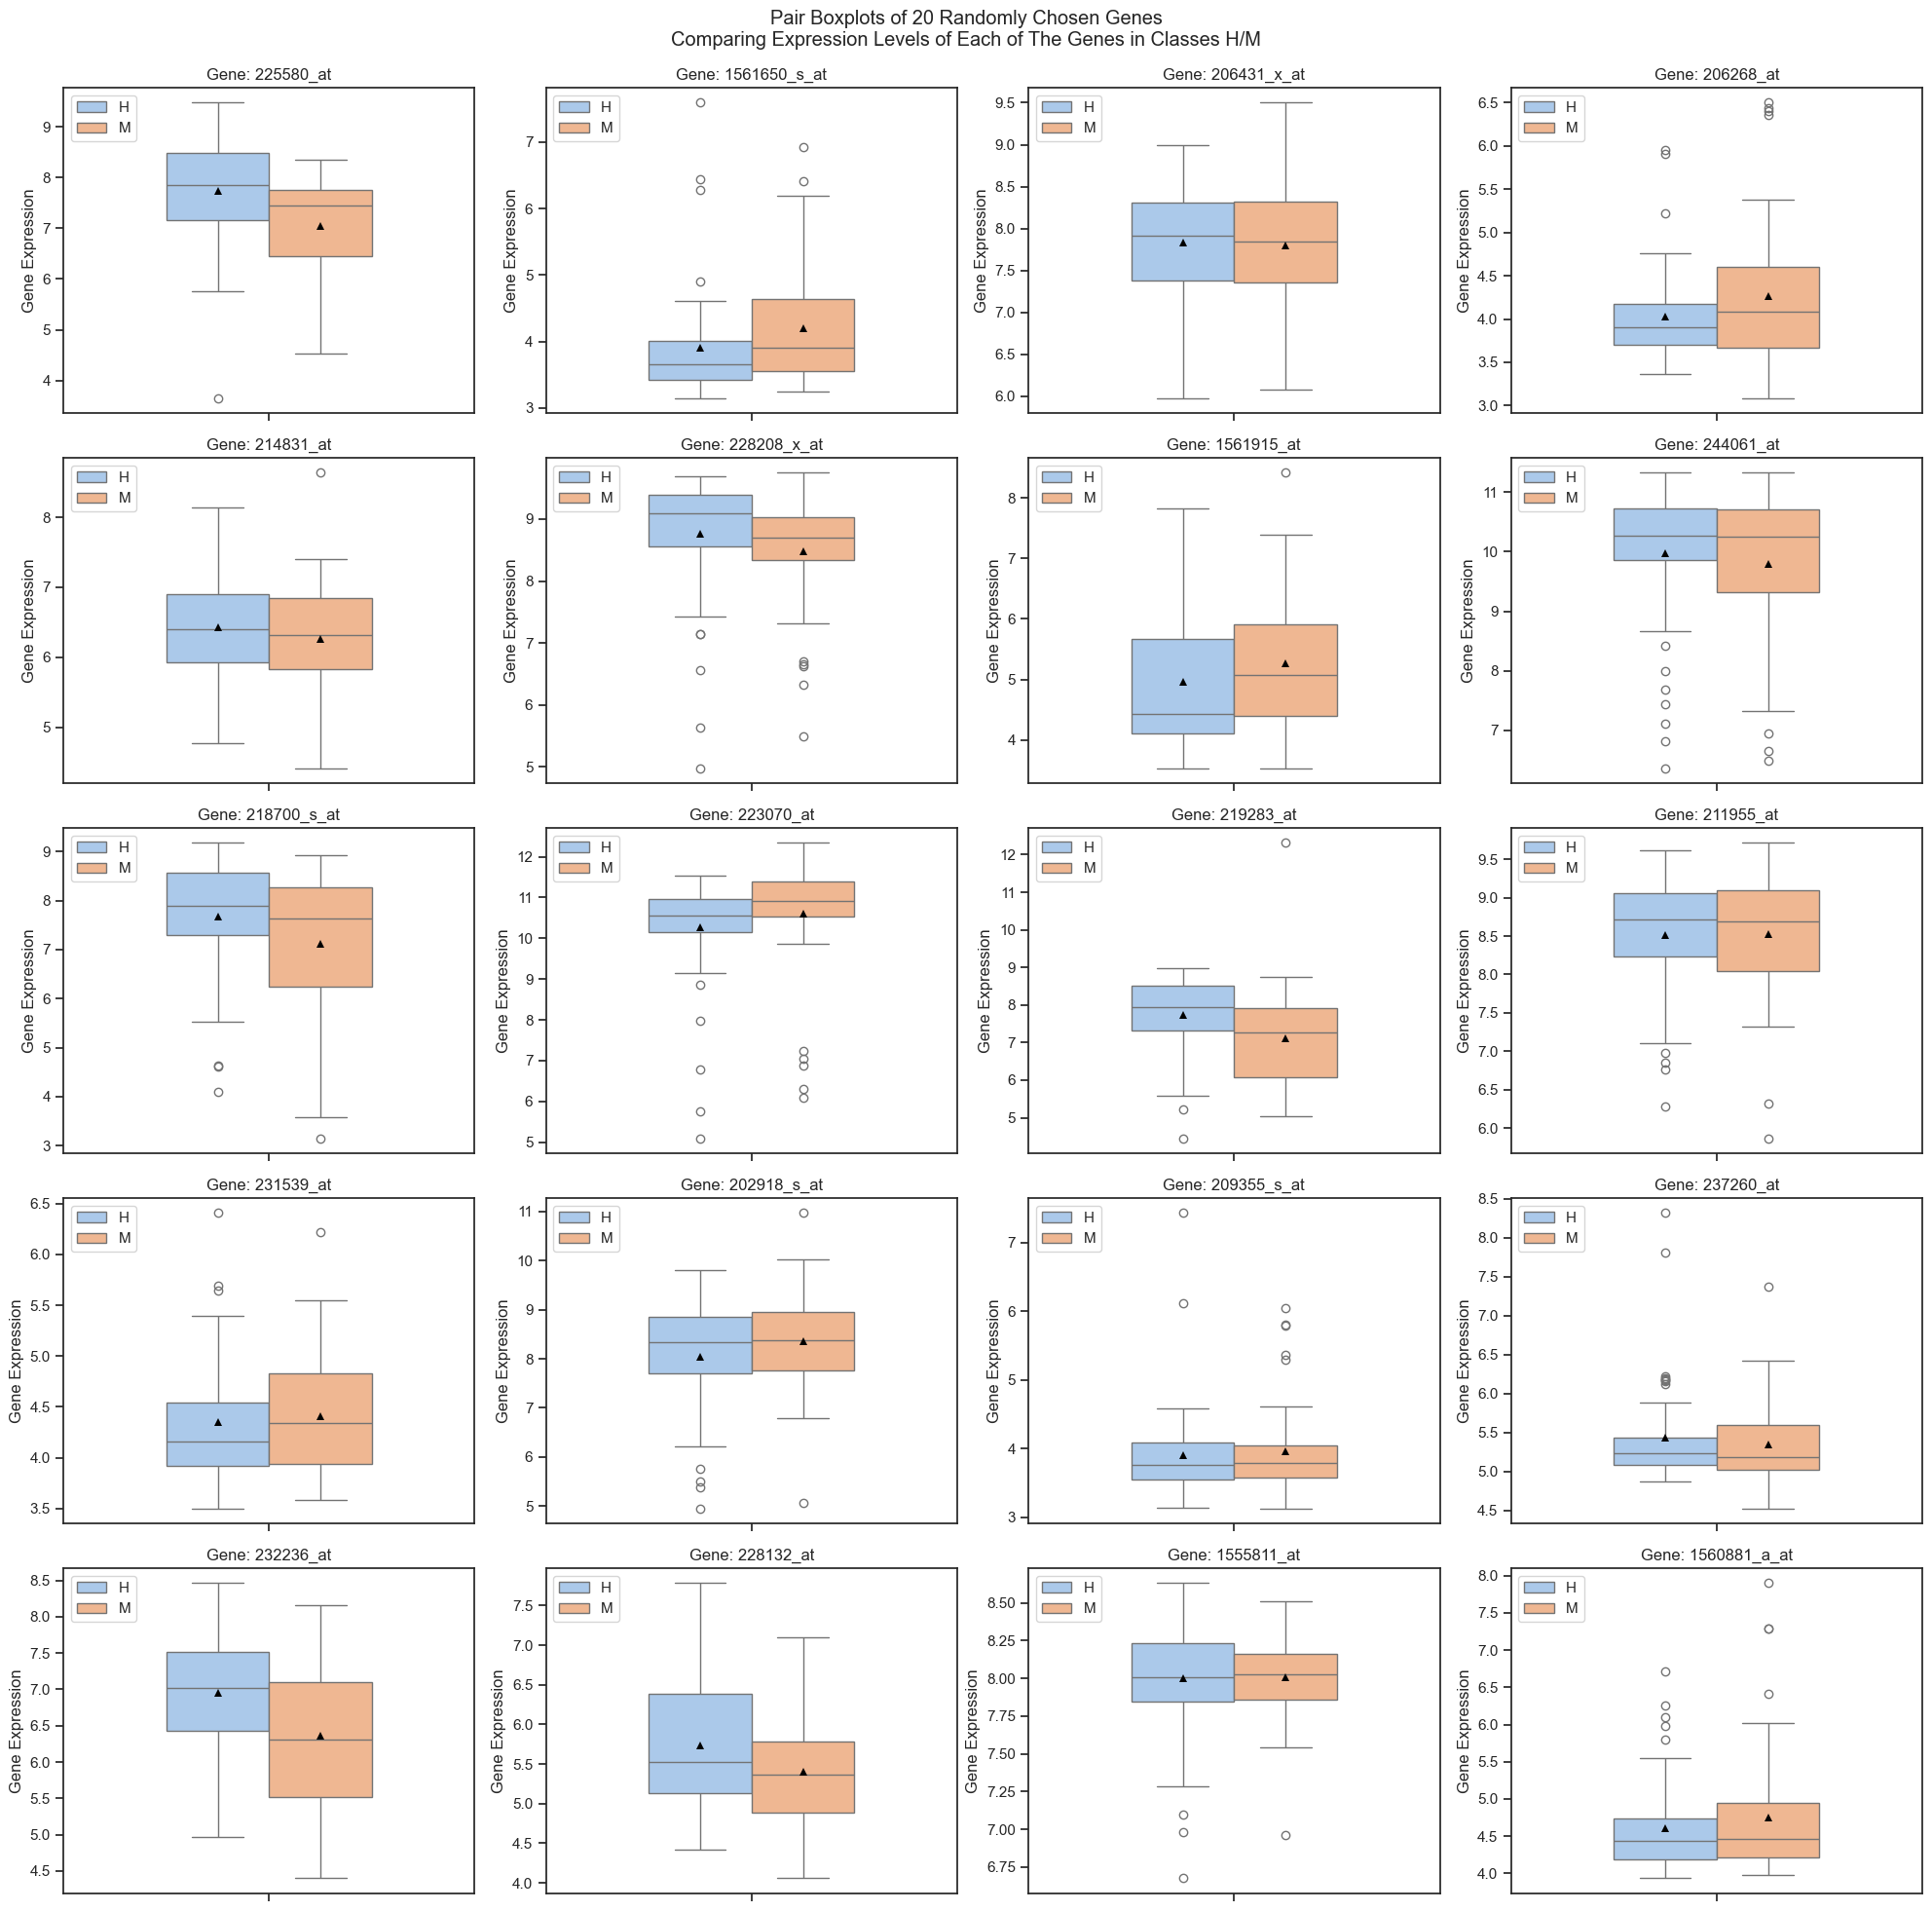

In [7]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

all_gene_names = transposed_data_frame_without_incomplete_genes.columns
selected_genes = np.random.choice(all_gene_names, 20, replace=False)
selected_genes_with_label = np.insert(selected_genes, 0, "Class")
subset_data_without_incomplete_genes = transposed_data_frame_without_incomplete_genes[selected_genes_with_label]

for current_gene_name, gene in enumerate(selected_genes):
    gene_data = subset_data_without_incomplete_genes[[gene]].astype('float64')
    gene_data_with_class = pd.concat([subset_data_without_incomplete_genes["Class"], gene_data], axis=1)
    H_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "H"].astype(float)
    M_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "M"].astype(float)
    
    sns.boxplot(y=gene,
                hue="Class",
                data=gene_data_with_class, 
                ax=axes[current_gene_name], showfliers=True, showmeans=True, meanprops={"markerfacecolor":"black", "markeredgewidth":0}, width=0.5)   
     
    axes[current_gene_name].set_title(f'Gene: {gene}')
    axes[current_gene_name].set_ylabel('Gene Expression')
    axes[current_gene_name].legend(loc='upper left')

plt.suptitle("Pair Boxplots of 20 Randomly Chosen Genes\nComparing Expression Levels of Each of The Genes in Classes H/M")
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

b. <b>WRS for differential expression (DE)</b><br>
1. <b>Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?</b><br>Under the null model, since there are 99 sampled patients the average rank is $\frac{99+1}{2}=50$.  There are 49 sampled patients labeled "M" so the expected sum of ranks under the null model is $49*\frac{99+1}{2} = 2450$


In [8]:
49*((99+1)/2)

2450.0

2. <b>Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?</b><br>RS(g) takes on its maximal value, $c$ when the ranks of the expression levels of the "M" samples are 51 through 99.  $c=49*\frac{51+99}{2} = 3675$

In [9]:
49*((51+99)/2)

3675.0

3. <b>Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)</b><br>Under the null model, the probability that RS(g) = c is $\frac{1}{99 \choose 49}$.  The reason is because under the null model every ranking arrangement is equally possible since there is no distinction between the "M" and "H" groups under the null model.  The situation where RS(g) = c is just one of the ${99 \choose 49}$ equal rank possibilities, so its probability is $\frac{1}{99 \choose 49}$ which is about $1.98*10^{-29}$.

In [10]:
1/(math.comb(99, 49))

1.9823306042836678e-29

4. <b>Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2?
(Provide formulas and explain them)</b><br>The probability that RS(g) = c-1 is also $\frac{1}{99 \choose 49}$.  This is because there is only one arrangement that will yield RS(g) = c-1 = 3674.  That is the where the lowest of the M ranks in the maximum ranking of M, 51, is reduced by 1 so that the ranks of M are now 50, 52, 53,...,99.  This is the only arrangment that will yield a rank sum of c-1 since we need to reduce one of the ranks by one to get c-1 but if we reduce anything but rank 51 we would get an overlap of ranks (i.e. more than one of the same rank).
\
\
The probability of RS(g) = c-2 is $\frac{2}{99 \choose 49}$ since there are 2 arrangements that will yield RS(g) = c-2 = 3673.  The 2 arrangments are 49, 52, 53, 54,..,99 and 50, 51, 53, 54, 55,...,99.  The explanation is that to reduce the rank sum by 2 either we need to reduce a sinlge rank by 2 or two of the rankings by 1.  We can reduce rankings 51 and 52 by 1 each so we would get 50, 51, 53, 54, 55,...,99.  (This is same arrangement as if we would reduce rank 52 by 2).  The other option is we could reduce the lowest rank, rank 51, by 2, so we would get 49, 52, 53, 54,..,99.  These are 2 out of the $99 \choose 49$ combinations so the probability of getting RS(g) = c-2 is $\frac{2}{99 \choose 49}$ which is about $3.96*10^{-29}$

In [11]:
2/(math.comb(99, 49))

3.9646612085673355e-29

5. <b>Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.</b>

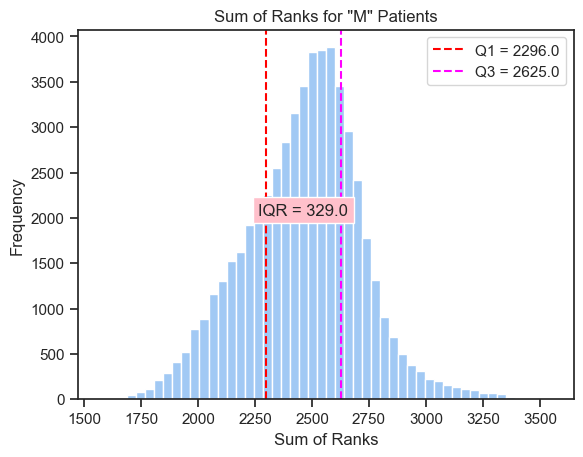

In [12]:
ranks = data_without_incomplete_genes.loc["1007_s_at":].astype(float).rank(axis=1, ascending=True)
sum_of_ranks_M = ranks.loc[:, pd.Index(data_without_incomplete_genes.loc["Class"] == "M")].sum(axis=1)

Q1 = sum_of_ranks_M.quantile(0.25)
Q3 = sum_of_ranks_M.quantile(0.75)
IQR = Q3 - Q1

sum_of_ranks_M.plot(kind='hist', bins=50)

plt.title('Sum of Ranks for "M" Patients')
plt.xlabel('Sum of Ranks')
plt.ylabel('Frequency')

# Adding a line for Q1 and Q3 on the plot
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 = {Q1}')
plt.axvline(Q3, color='magenta', linestyle='--', label=f'Q3 = {Q3}')

plt.text(x=np.mean([Q1, Q3]), y=plt.ylim()[1]*0.5, s=f'IQR = {IQR}', 
         bbox=dict(facecolor='pink'), ha='center')

plt.legend()

plt.show()

c. <b>Differential Expression:</b> The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [13]:
number_of_overexpressed_genes_in_M_using_WRS = 0
number_of_underexpressed_genes_in_M_using_WRS = 0
number_of_overexpressed_genes_in_M_using_ttest = 0
number_of_underexpressed_genes_in_M_using_ttest = 0

WRS_overexpressed_p_values_list = []
WRS_underexpressed_p_values_list = []

ttest_overexpressed_p_values_list = []

M_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "M"]
H_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "H"]


for current_gene_name in transposed_data_frame_without_incomplete_genes.columns[1:]:
    current_gene_expression_for_group_M = M_group_transposed_data[current_gene_name].astype(float)
    current_gene_expression_for_group_H = H_group_transposed_data[current_gene_name].astype(float)
    
    WRS_overexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='greater').pvalue
    WRS_overexpressed_p_values_list.append(WRS_overexpressed_p_value)
    if WRS_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_WRS += 1
    
    WRS_underexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    WRS_underexpressed_p_values_list.append(WRS_underexpressed_p_value)
    if WRS_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_WRS += 1
    
    ttest_overexpressed_p_value = ttest_ind(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='greater').pvalue
    ttest_overexpressed_p_values_list.append(ttest_overexpressed_p_value)
    if ttest_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_ttest += 1
        
    ttest_underexpressed_p_value = ttest_ind(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    if ttest_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_ttest += 1


print(f'Number of overexpressed genes in M using WRS is: {number_of_overexpressed_genes_in_M_using_WRS}')
print(f'Number of underexpressed genes in M using WRS is: {number_of_underexpressed_genes_in_M_using_WRS}\n')
print(f'Number of overexpressed genes in M using ttest is: {number_of_overexpressed_genes_in_M_using_ttest}')
print(f'Number of underexpressed genes in M using ttest is: {number_of_underexpressed_genes_in_M_using_ttest}')


Number of overexpressed genes in M using WRS is: 10787
Number of underexpressed genes in M using WRS is: 10667

Number of overexpressed genes in M using ttest is: 8517
Number of underexpressed genes in M using ttest is: 8639


d. <b>Correlations:</b>
Select the 80 most significant genes from each one of the one- sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.


1. <b>Compute Spearman 𝜌 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.</b>

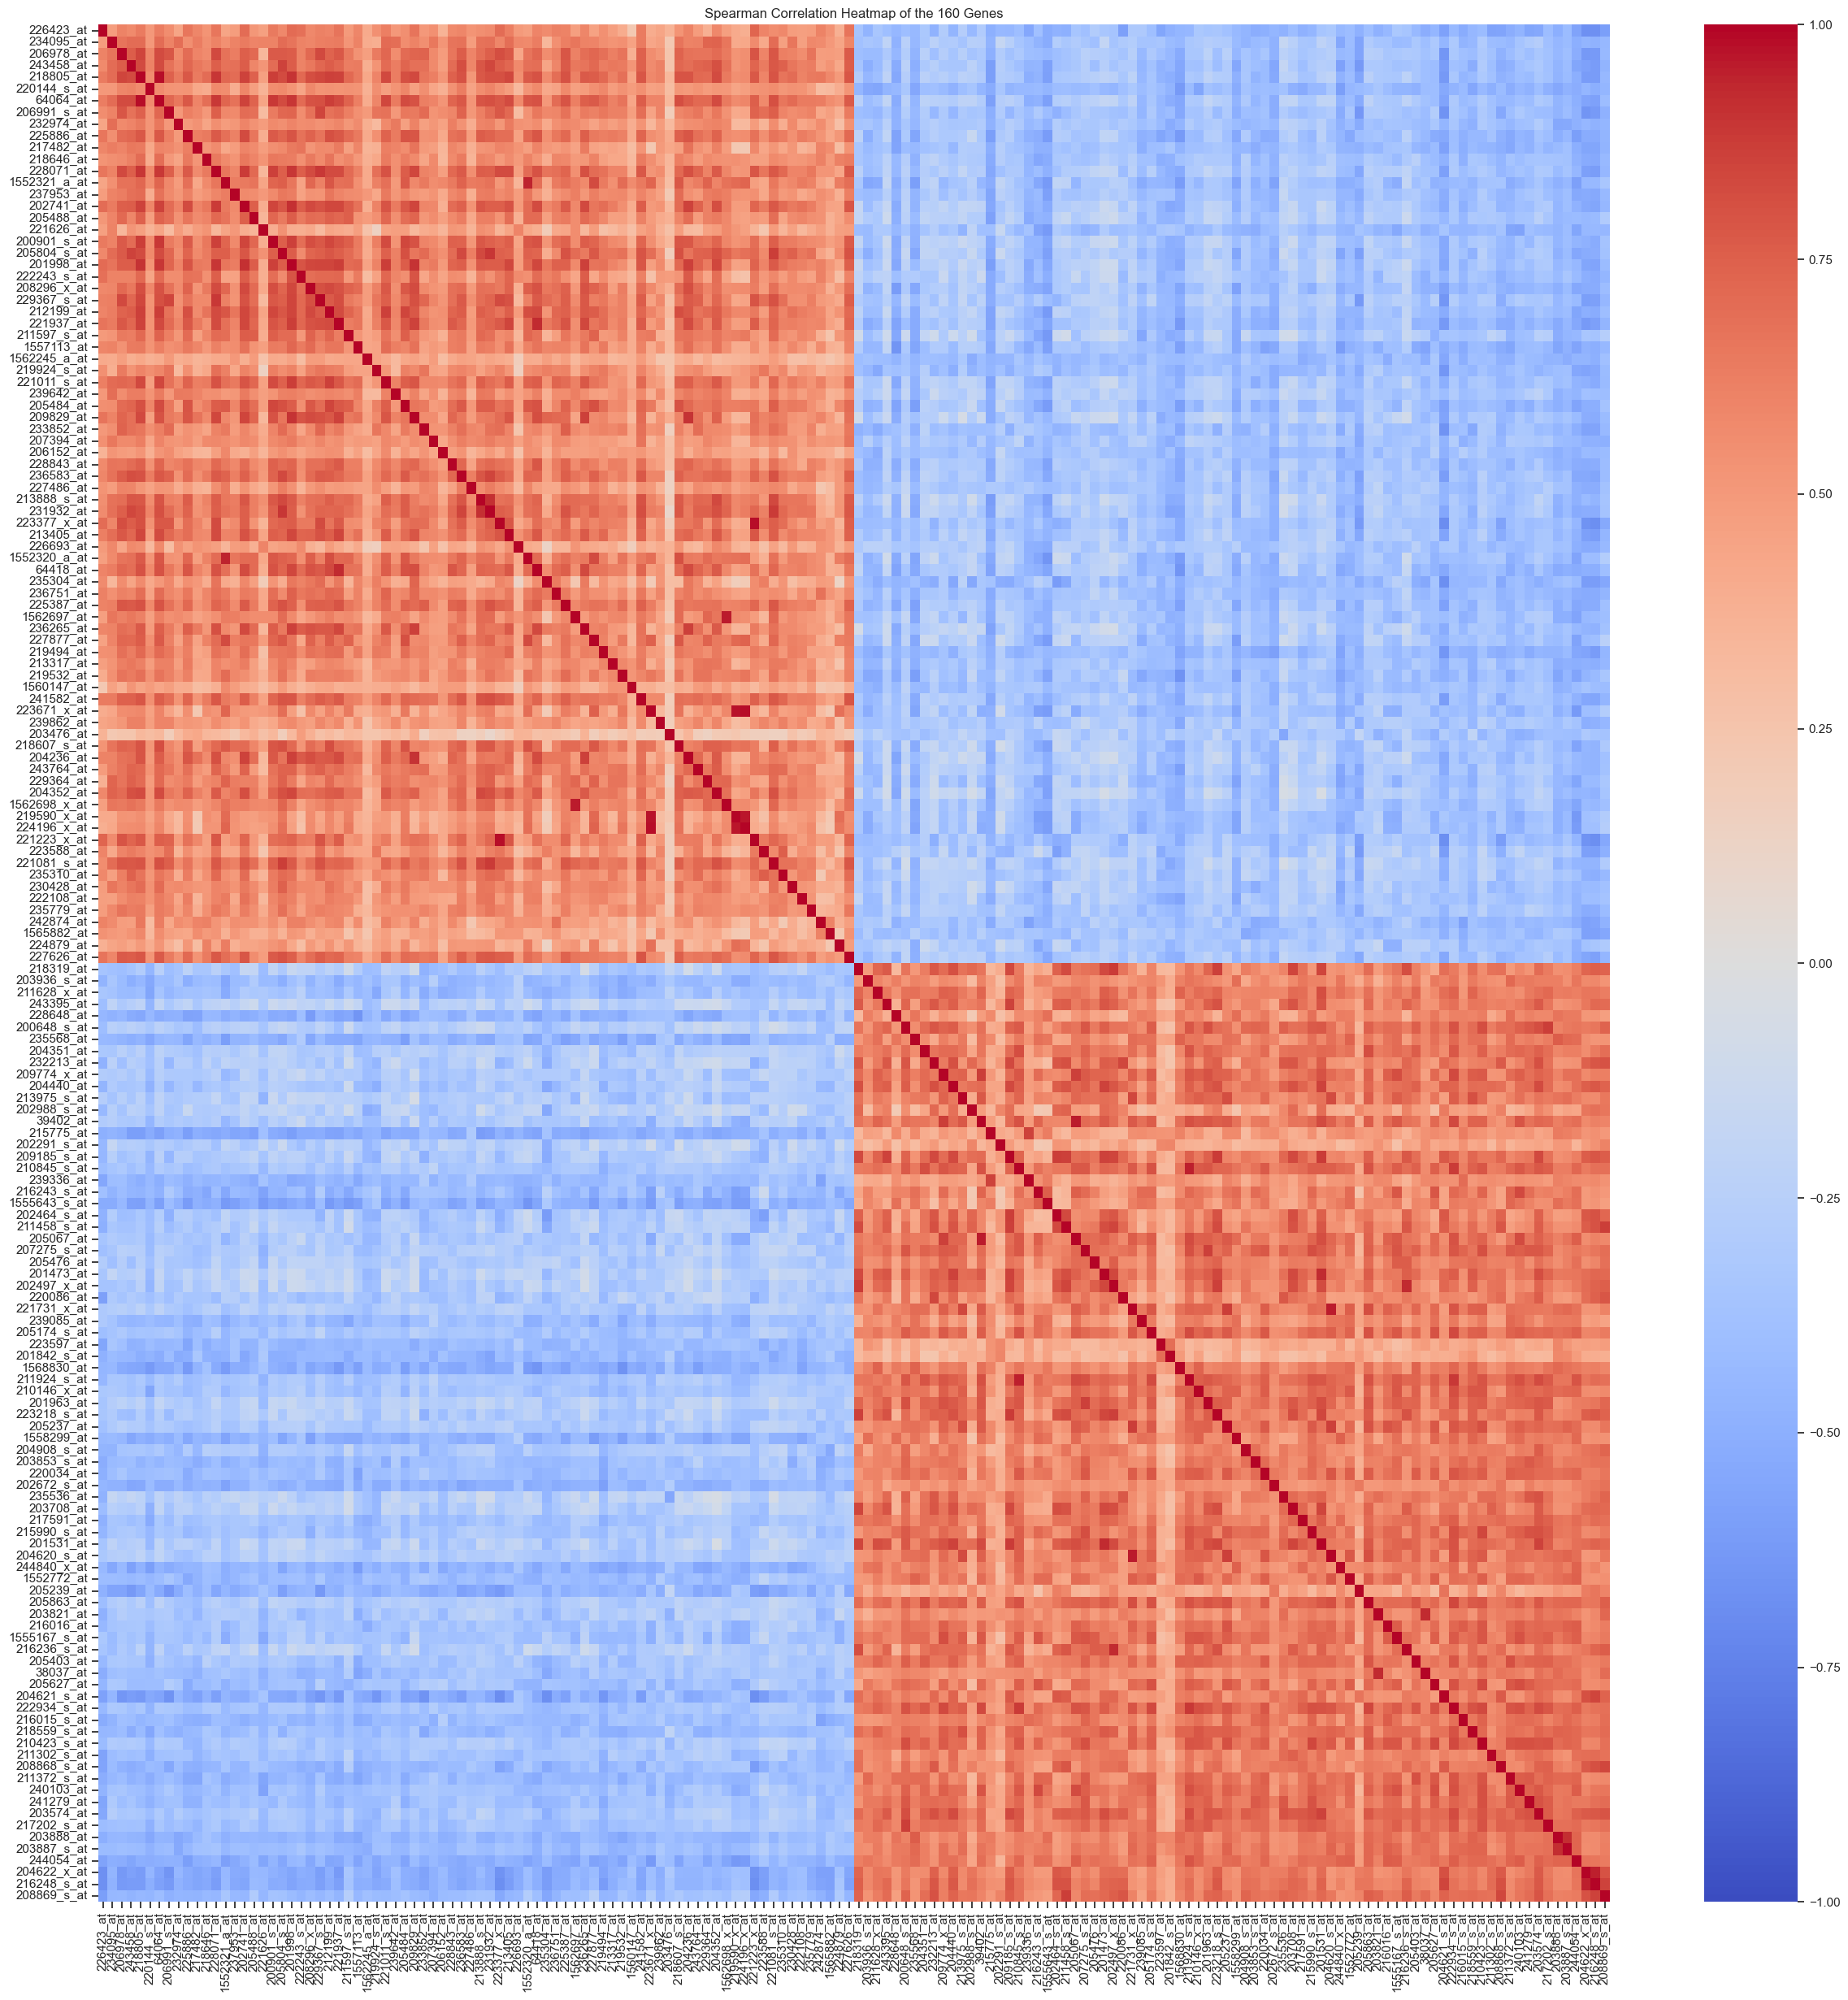

In [14]:
indices = data_without_incomplete_genes.index[1:]
df_WRS_left_results = pd.DataFrame({
    'WRS_underexpressed_p_values_list': WRS_underexpressed_p_values_list
}, index=indices)
df_WRS_right_results = pd.DataFrame({
    'WRS_overexpressed_p_values_list': WRS_overexpressed_p_values_list
}, index=indices)
most_underexpressed_genes = df_WRS_left_results.sort_values(by='WRS_underexpressed_p_values_list').head(80)
most_overexpressed_genes = df_WRS_right_results.sort_values(by='WRS_overexpressed_p_values_list').head(80)[::-1]

#Get data in proper format
D = pd.concat([most_underexpressed_genes,most_overexpressed_genes])
D = pd.concat([D,data], axis=1, join="inner")
D = D.iloc[:,2:]

corr_matrix = D.transpose().corr(method='spearman')
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, yticklabels=corr_matrix.index, xticklabels=corr_matrix.index)
plt.title('Spearman Correlation Heatmap of the 160 Genes')
plt.show()

2. <b>Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜌?</b><br> Under a null model that genes are pairwise independent the expected spearman correlation is 0.

3. <b>Now compute the Spearman 𝜌 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.</b>

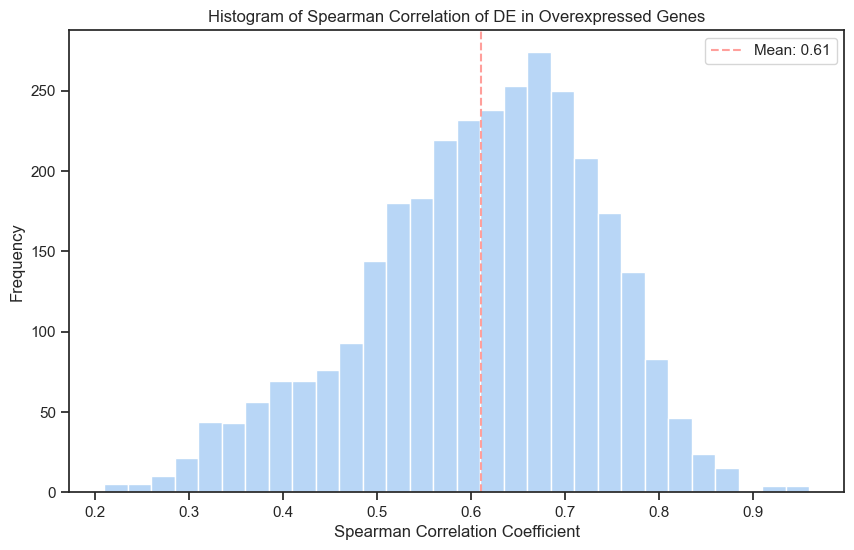

In [15]:
D_over_expressed = D[80:]

corr_matrix_over = D_over_expressed.transpose().astype(float).corr(method='spearman')

# Get the indices for the upper triangle of the correlation matrix
upper_tri_indices = np.triu_indices_from(corr_matrix_over, k=1)
upper_tri_values = corr_matrix_over.values[upper_tri_indices]
mean_corr = np.mean(upper_tri_values)

plt.figure(figsize=(10, 6))
sns.histplot(upper_tri_values, bins=30)
plt.title('Histogram of Spearman Correlation of DE in Overexpressed Genes')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Frequency')

plt.axvline(mean_corr, color='r', linestyle='--', label=f'Mean: {mean_corr:.2f}')
plt.legend()

plt.show()

The average value I observed of the pairwise spearman correlations is 0.61.  In the prior section if we assume that the genes are pairwise independent then their expected spearman correlation is 0.  However, here the genes we have selected are not pairwise independent because these are genes that are all highly over expressed in "M" patients (based on having) so the "M" samples for these genes have much higher DE rankings than average.  Therefore, they are correlated.

4. <b>What can you report about co-expression of genes in D (co- expression is inferred from the correlation of the expression levels of genes, across a set of samples)?</b><br>We need to use a Fisher transform to decide what level of correlation is statistically significant.  If we choose a 5% 2-sided significance threshold, that would correspond to critical spearman coefficient of $\pm.203$ (i.e. there is a 5% chance that 2 independent vectors would yield a spearman correlation > .203 or < -.203). At this significance level we would report 12,251 pairs of significantly correlated genes (see calculations below). <br>
However, even the pairs of genes that are reported under these criteria may still not be significant since we are looking at 54,628 genes which is about 1.5 billion pairs of genes. With this many possiblities we can expect to find several highly correlated pairs of genes by chance.  We will need to use FDR to decide an appropriate threshold to report a pair of genes as being significantly correlated (see FDR calculation in part d.5 below).


In [16]:
# 3.d.4 find the spearman correlation that corresponds to a 5% 2-tailed significance level.  To do this we will use the inverse fisher transform
significance = .05
z_value = norm.ppf(1-significance/2,0,1)
fisher_step_1 = z_value/np.sqrt((data_without_incomplete_genes.shape[1]-3)/1.06)
spearman_rho = (np.exp(2*fisher_step_1)-1) / (np.exp(2*fisher_step_1)+1)
print(f'At a 2-sided p-value threshold of {significance} the critical spearman coefficient is \u00B1{spearman_rho:.3f}')

corr_matrix = D.transpose().corr(method='spearman')

# Get the indices for the upper triangle of the correlation matrix
upper_tri_indices = np.triu_indices_from(corr_matrix, k=1)
rhos = corr_matrix.values[upper_tri_indices]

number_reported = sum(rhos>spearman_rho) + sum(rhos<-spearman_rho)
print(f'At a 2-sided p-value threshold of {significance} we would report {number_reported} significantly correlated pairs of genes')


At a 2-sided p-value threshold of 0.05 the critical spearman coefficient is ±0.203
At a 2-sided p-value threshold of 0.05 we would report 12251 significantly correlated pairs of genes


5. <b>What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.</b>

In [17]:
#calculate fisher transform on spearman 160 choose 2 spearman coefficients
samples = D.shape[1]
F_transformed_rhos = 1/2*np.log((1+rhos)/(1-rhos))*np.sqrt((samples-3)/1.06)

#calculate p-values of each spearman rho and sort rhos by p-values
two_sided_pvalues = 2 * norm.sf(abs(F_transformed_rhos))
rhos_df = pd.DataFrame({'spearman rho': rhos,'fisher transformed rho':F_transformed_rhos, '2-sided p-values': two_sided_pvalues})
rhos_df_sorted = rhos_df.sort_values(by='2-sided p-values', ascending=True)
rhos_df_sorted['p-value rank'] = np.arange(len(rhos_df_sorted)) + 1

#calculate FDR for each row and compare to 5%
number_of_genes = data_without_incomplete_genes.shape[0]-1
genes_pairs = number_of_genes*(number_of_genes-1)/2
rhos_df_sorted['FDR'] = rhos_df_sorted['2-sided p-values'] * genes_pairs / rhos_df_sorted['p-value rank']
reported_correlations = sum(rhos_df_sorted['FDR']<.05)

print(f'At a an FDR of 5% we can report {reported_correlations} significantly correlated pairs of genes')


At a an FDR of 5% we can report 5502 significantly correlated pairs of genes


In the above FDR calculation we assumed an FDR of 5%.  This means that out of all observed p-values that are significant we expected that no more than 5% of those will be by chance and therefore will be reported/rejected accidentally.  In this case, we found that for a spearman coefficient of ~$\pm.5$ we attain a 2-sided p-value of ~$1.84*10^{-7}$ which means we expect ~275 pairs of genes out the 1.5 billion pairs to have at least this level of correlation by chance.  Because we actually observed 5502 correlations with more extreme correlations than this, we have and FDR of .05 = 275/5502.  This is the largest correlation we can report at an FDR level of 5% and therefore, we can report all p-values more extreme than this (all more extreme correlations than this), so we can report 5502 pairs of genes that are signficantly correlated.  An alternative way to look at this is the under an FDR level of 5%, the p-value threshold for each gene pair is ~$1.84*10^{-7}.$ 

6. <b>What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?</b><br>The disadavantage of computing co-expression for all genes in the study rather than only for genes in D would be the time and computing power to calculate and analyze 1.5 billion possible pairs of genes and their correlations and hypothesis testing etc.  Additionally, the benefit of doing this would not be great since we can find most correlated genes using D. The advantage would be to potentially discover more pairs genes that are correlated that we would miss if we just looked at D.

<b>3.e</b>

1. <b>Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.<br>
State, for each comparison, the number of genes, k, at which we observe with an FDR threshold of:
a) 𝜏 = 0.05 b) 𝜏 = 0.01 c) 𝜏 = 0.005.<br>If these events are not observed at any k>0, then make that statement.</b>

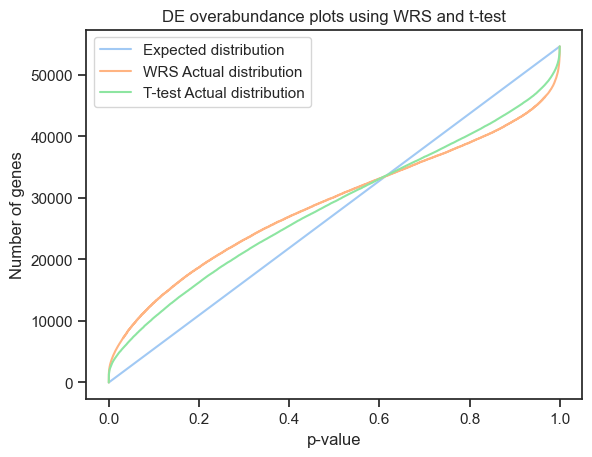

,number of genes with WRS FDR threshold,number of genes with t-test FDR threshold
threshold,,
0.050,2784.0,2104.0
0.010,1601.0,1305.0
0.005,1323.0,1104.0


In [18]:
N = len(WRS_overexpressed_p_values_list)
sorted_WRS_overexpressed_p_values_list = np.sort(WRS_overexpressed_p_values_list)
sorted_ttest_overexpressed_p_values_list = np.sort(ttest_overexpressed_p_values_list)

plt.plot(np.linspace(0, 1, N), np.arange(N), label="Expected distribution")
plt.plot(sorted_WRS_overexpressed_p_values_list, np.arange(N), label="WRS Actual distribution")
plt.plot(sorted_ttest_overexpressed_p_values_list, np.arange(N), label="T-test Actual distribution")

plt.title("DE overabundance plots using WRS and t-test")
plt.ylabel("Number of genes")
plt.xlabel("p-value")
plt.legend()
plt.show()

WRS_FDR_list, ttest_FDR_list = [], []
for i in range(1, N+1):
    WRS_current_p_value = sorted_WRS_overexpressed_p_values_list[i - 1]
    WRS_current_FDR = (WRS_current_p_value * N) / i
    WRS_FDR_list.append(WRS_current_FDR)
    
    ttest_current_p_value = sorted_ttest_overexpressed_p_values_list[i - 1]
    ttest_current_FDR = (ttest_current_p_value * N) / i
    ttest_FDR_list.append(ttest_current_FDR)

number_of_genes_with_WRS_FDR_threshold = pd.DataFrame({"threshold": [], "number of genes with WRS FDR threshold": [], "number of genes with t-test FDR threshold": []})
for threshold in [0.05, 0.01, 0.005]:
    WRS_k = next(index for index, WRS_FDR in enumerate(WRS_FDR_list) if (WRS_FDR >= threshold))
    ttest_k = next(index for index, ttest_FDR in enumerate(ttest_FDR_list) if (ttest_FDR >= threshold))
    new_row = pd.DataFrame({"threshold": [threshold], "number of genes with WRS FDR threshold": [WRS_k], "number of genes with t-test FDR threshold": [ttest_k]})
    number_of_genes_with_WRS_FDR_threshold = pd.concat([number_of_genes_with_WRS_FDR_threshold, new_row], ignore_index=True)

number_of_genes_with_WRS_FDR_threshold = number_of_genes_with_WRS_FDR_threshold.set_index("threshold")
number_of_genes_with_WRS_FDR_threshold
        

2. 

a. For all genes, compute $p_U(g)$

In [19]:
classes_row = pd.DataFrame(data_without_incomplete_genes.loc["Class"]).T
classes_binary_row = classes_row.replace({"M": 1, "H": 0})
concatenated_classes_binary_row = pd.concat([classes_binary_row] * 99, ignore_index=True)
np.fill_diagonal(concatenated_classes_binary_row.values, 1 - classes_binary_row)

genes_list = transposed_data_frame_without_incomplete_genes.columns[1:]

p_values_dataframe = pd.DataFrame(index=genes_list, columns=["Gene Name", "max p value replacing one M to H", "max p value replacing one H to M", "p(u)(g)", "p(u)(g) fdr"])
p_values_dataframe["Gene Name"] = np.array(genes_list)
for current_gene_name in genes_list:
    current_gene_expression = pd.DataFrame(data_without_incomplete_genes.loc[current_gene_name]).T.astype(float)
    
    concatenated_classes_binary_row_with_current_gene_expression = pd.concat([current_gene_expression, concatenated_classes_binary_row])
    sorted_concatenated_classes_binary_row_with_current_gene_expression = concatenated_classes_binary_row_with_current_gene_expression.sort_values(by=current_gene_name, axis=1)
    ranks = rankdata(sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[current_gene_name]).astype(int)

    # Calculating the max p value where we add one "H" instead of one "H"
    current_gene_ranksums_for_each_division = (sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[0:] * ranks).sum(axis=1)
    max_rank_division_index = current_gene_ranksums_for_each_division.idxmin()
    M_group_mask = (sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[max_rank_division_index] == 1)
    H_group_mask = (sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[max_rank_division_index] == 0)
    M_group = sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[current_gene_name][M_group_mask]
    H_group = sorted_concatenated_classes_binary_row_with_current_gene_expression.loc[current_gene_name][H_group_mask]
    p_values_dataframe.loc[current_gene_name, "max p value replacing one M to H"] = ranksums(M_group, H_group, alternative='greater').pvalue
    
    # Calculating the max p value where we add one "H" instead of one "H"
    actual_classes_binary_row_with_current_gene_expression = pd.concat([current_gene_expression, classes_binary_row])
    sorted_actual_classes_binary_row_with_current_gene_expression = actual_classes_binary_row_with_current_gene_expression.sort_values(by=current_gene_name, axis=1)
    current_gene_actual_classes_after_sorting_by_gene_expression = list(sorted_actual_classes_binary_row_with_current_gene_expression.loc["Class"])
    index_of_first_H_occurence = next((index for index, value in enumerate(current_gene_actual_classes_after_sorting_by_gene_expression) if value == 0), None)
    sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M = pd.DataFrame.copy(sorted_actual_classes_binary_row_with_current_gene_expression)
    sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.iloc[1, index_of_first_H_occurence] = 1 - sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.iloc[1, index_of_first_H_occurence]
    M_group_mask_ = sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.loc["Class"] == 1
    H_group_mask_ = sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.loc["Class"] == 0
    M_group_ = sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.loc[current_gene_name][M_group_mask_]
    H_group_ = sorted_classes_binary_row_with_current_gene_expression_after_changing_the_first_H_to_M.loc[current_gene_name][H_group_mask_]
    p_values_dataframe.loc[current_gene_name, "max p value replacing one H to M"] = ranksums(M_group_, H_group_, alternative='greater').pvalue
    
    p_values_dataframe.loc[current_gene_name, "p(u)(g)"] = max(p_values_dataframe.loc[current_gene_name, "max p value replacing one M to H"], p_values_dataframe.loc[current_gene_name, "max p value replacing one H to M"])

p_values_dataframe.index = np.arange(1, len(genes_list)+1)
p_values_dataframe["Actual p value"] = np.array(WRS_overexpressed_p_values_list)
sorted_p_u_dataframe = p_values_dataframe.sort_values(by="Actual p value")
sorted_p_u_dataframe.index = np.arange(1, sorted_p_u_dataframe.shape[0]+1)

b. <b>Run the FDR procedure with 𝜏 = 0.05 using $p_U(g)$ (instead of the original p-values as computed in section 3e1a above). <br>How many genes can you report now?</b>

In [20]:
N = len(sorted_p_u_dataframe)
for i, current_gene_name in enumerate(sorted_p_u_dataframe.index):
    current_fdr = (sorted_p_u_dataframe.loc[current_gene_name, "p(u)(g)"] * N) / (i + 1)
    sorted_p_u_dataframe.loc[current_gene_name, "p(u)(g) fdr"] = current_fdr
    
number_of_reported_genes = next(index for index, p_u_FDR in enumerate(sorted_p_u_dataframe["p(u)(g) fdr"]) if (p_u_FDR >= 0.05))

print(f"We can report now {number_of_reported_genes} genes")

We can report now 1847 genes


c. <b>What is the intersection of the genes you can report above with the results of 3e1a. Explain.</b>

The genes reported under p_u_g are  a perfect subset of the genes reported in part 3.e.1 under the WRS test at FDR of .05 (i.e. there are no genes reported that are not reported in part 3.e.1)							
We essentially made it harder for each gene to be reported.  Now for a gene to be reported it must be more "robust".  When you get to the genes whose p-values are greater than .00256 then we stop reporting.

In [21]:
sorted_p_u_dataframe["Actual p value fdr"] = (np.sort(p_values_dataframe["Actual p value"]) * N) / np.arange(1, N+1)

print("Here we can see a zoom in for the indices region where the p(u)(g) fdr crosses the threshold:")
display((sorted_p_u_dataframe.iloc[1844:1852])[["Gene Name", "p(u)(g)", "p(u)(g) fdr"]])
print("Here we can see a zoom in for the indices region where the actual p value fdr crosses the threshold:")
display(sorted_p_u_dataframe.iloc[2804:2812][["Gene Name", "Actual p value", "Actual p value fdr"]])

Here we can see a zoom in for the indices region where the p(u)(g) fdr crosses the threshold:


,Gene Name,p(u)(g),p(u)(g) fdr
1845,215855_s_at,0.001675,0.049605
1846,202468_s_at,0.001682,0.04977
1847,201482_at,0.001682,0.049743
1848,213559_s_at,0.001701,0.050279
1849,1556670_at,0.00172,0.05082
1850,231863_at,0.001714,0.050598
1851,210365_at,0.001714,0.050571
1852,225418_at,0.001714,0.050543


Here we can see a zoom in for the indices region where the actual p value fdr crosses the threshold:


,Gene Name,Actual p value,Actual p value fdr
2805,236869_at,0.002560,0.049852
2806,203298_s_at,0.002560,0.049834
2807,201409_s_at,0.002560,0.049816
2808,234934_at,0.002560,0.049798
2809,222817_at,0.002588,0.050323
2810,236245_at,0.002588,0.050305
2811,1562247_at,0.002588,0.050287
2812,239843_at,0.002588,0.050269


3. <b>Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.</b>

/var/folders/2k/198b0h4941b0vjpw9dns0rbw0000gn/T/ipykernel_59168/1234009282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_incomplete_genes.loc["1007_s_at":, 'WRS_underexpressed_p_values_list'] = WRS_underexpressed_p_values_list


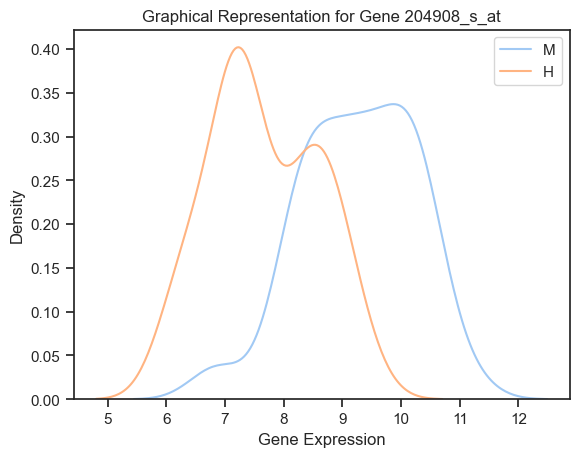

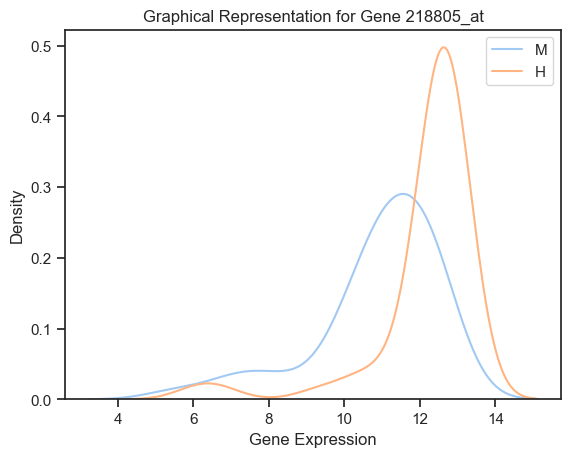

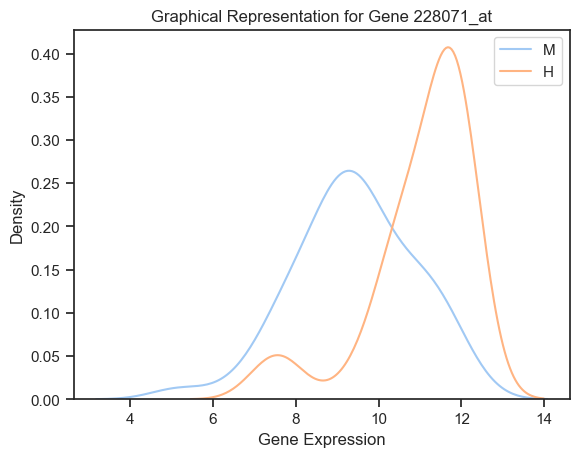

In [22]:
pd.set_option('display.max_columns', None)
classes_row.columns = id_ref_row.values[0]
M_mask = pd.DataFrame(classes_row.loc["Class", classes_row.loc["Class"] == "M"])
H_mask = classes_row.loc["Class", classes_row.loc["Class"] == "H"]

data_without_incomplete_genes.loc["1007_s_at":, 'WRS_underexpressed_p_values_list'] = WRS_underexpressed_p_values_list
data_sorted_by_WRS = data_without_incomplete_genes.sort_values(by='WRS_underexpressed_p_values_list')

D = pd.concat([data_sorted_by_WRS.iloc[:80],data_sorted_by_WRS.iloc[-81:]])
D = D.iloc[:160,:99]

D.columns = id_ref_row.loc["ID_REF"]

np.random.seed(18)

D_sample = D.sample(n=3)
D_sample_gene_expression_from_M = D_sample.loc[:, classes_row.loc["Class"] == "M"]
D_sample_gene_expression_from_H = D_sample.loc[:, classes_row.loc["Class"] == "H"]

for i in range(3):
    sns.kdeplot(D_sample_gene_expression_from_M.iloc[i].astype(float), label="M")
    sns.kdeplot(D_sample_gene_expression_from_H.iloc[i].astype(float), label="H")
    plt.title(f"Graphical Representation for Gene {D_sample.index[i]}")
    plt.xlabel('Gene Expression')
    plt.legend()
    plt.show()



4. <b>Heatmap:</b><br>
Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

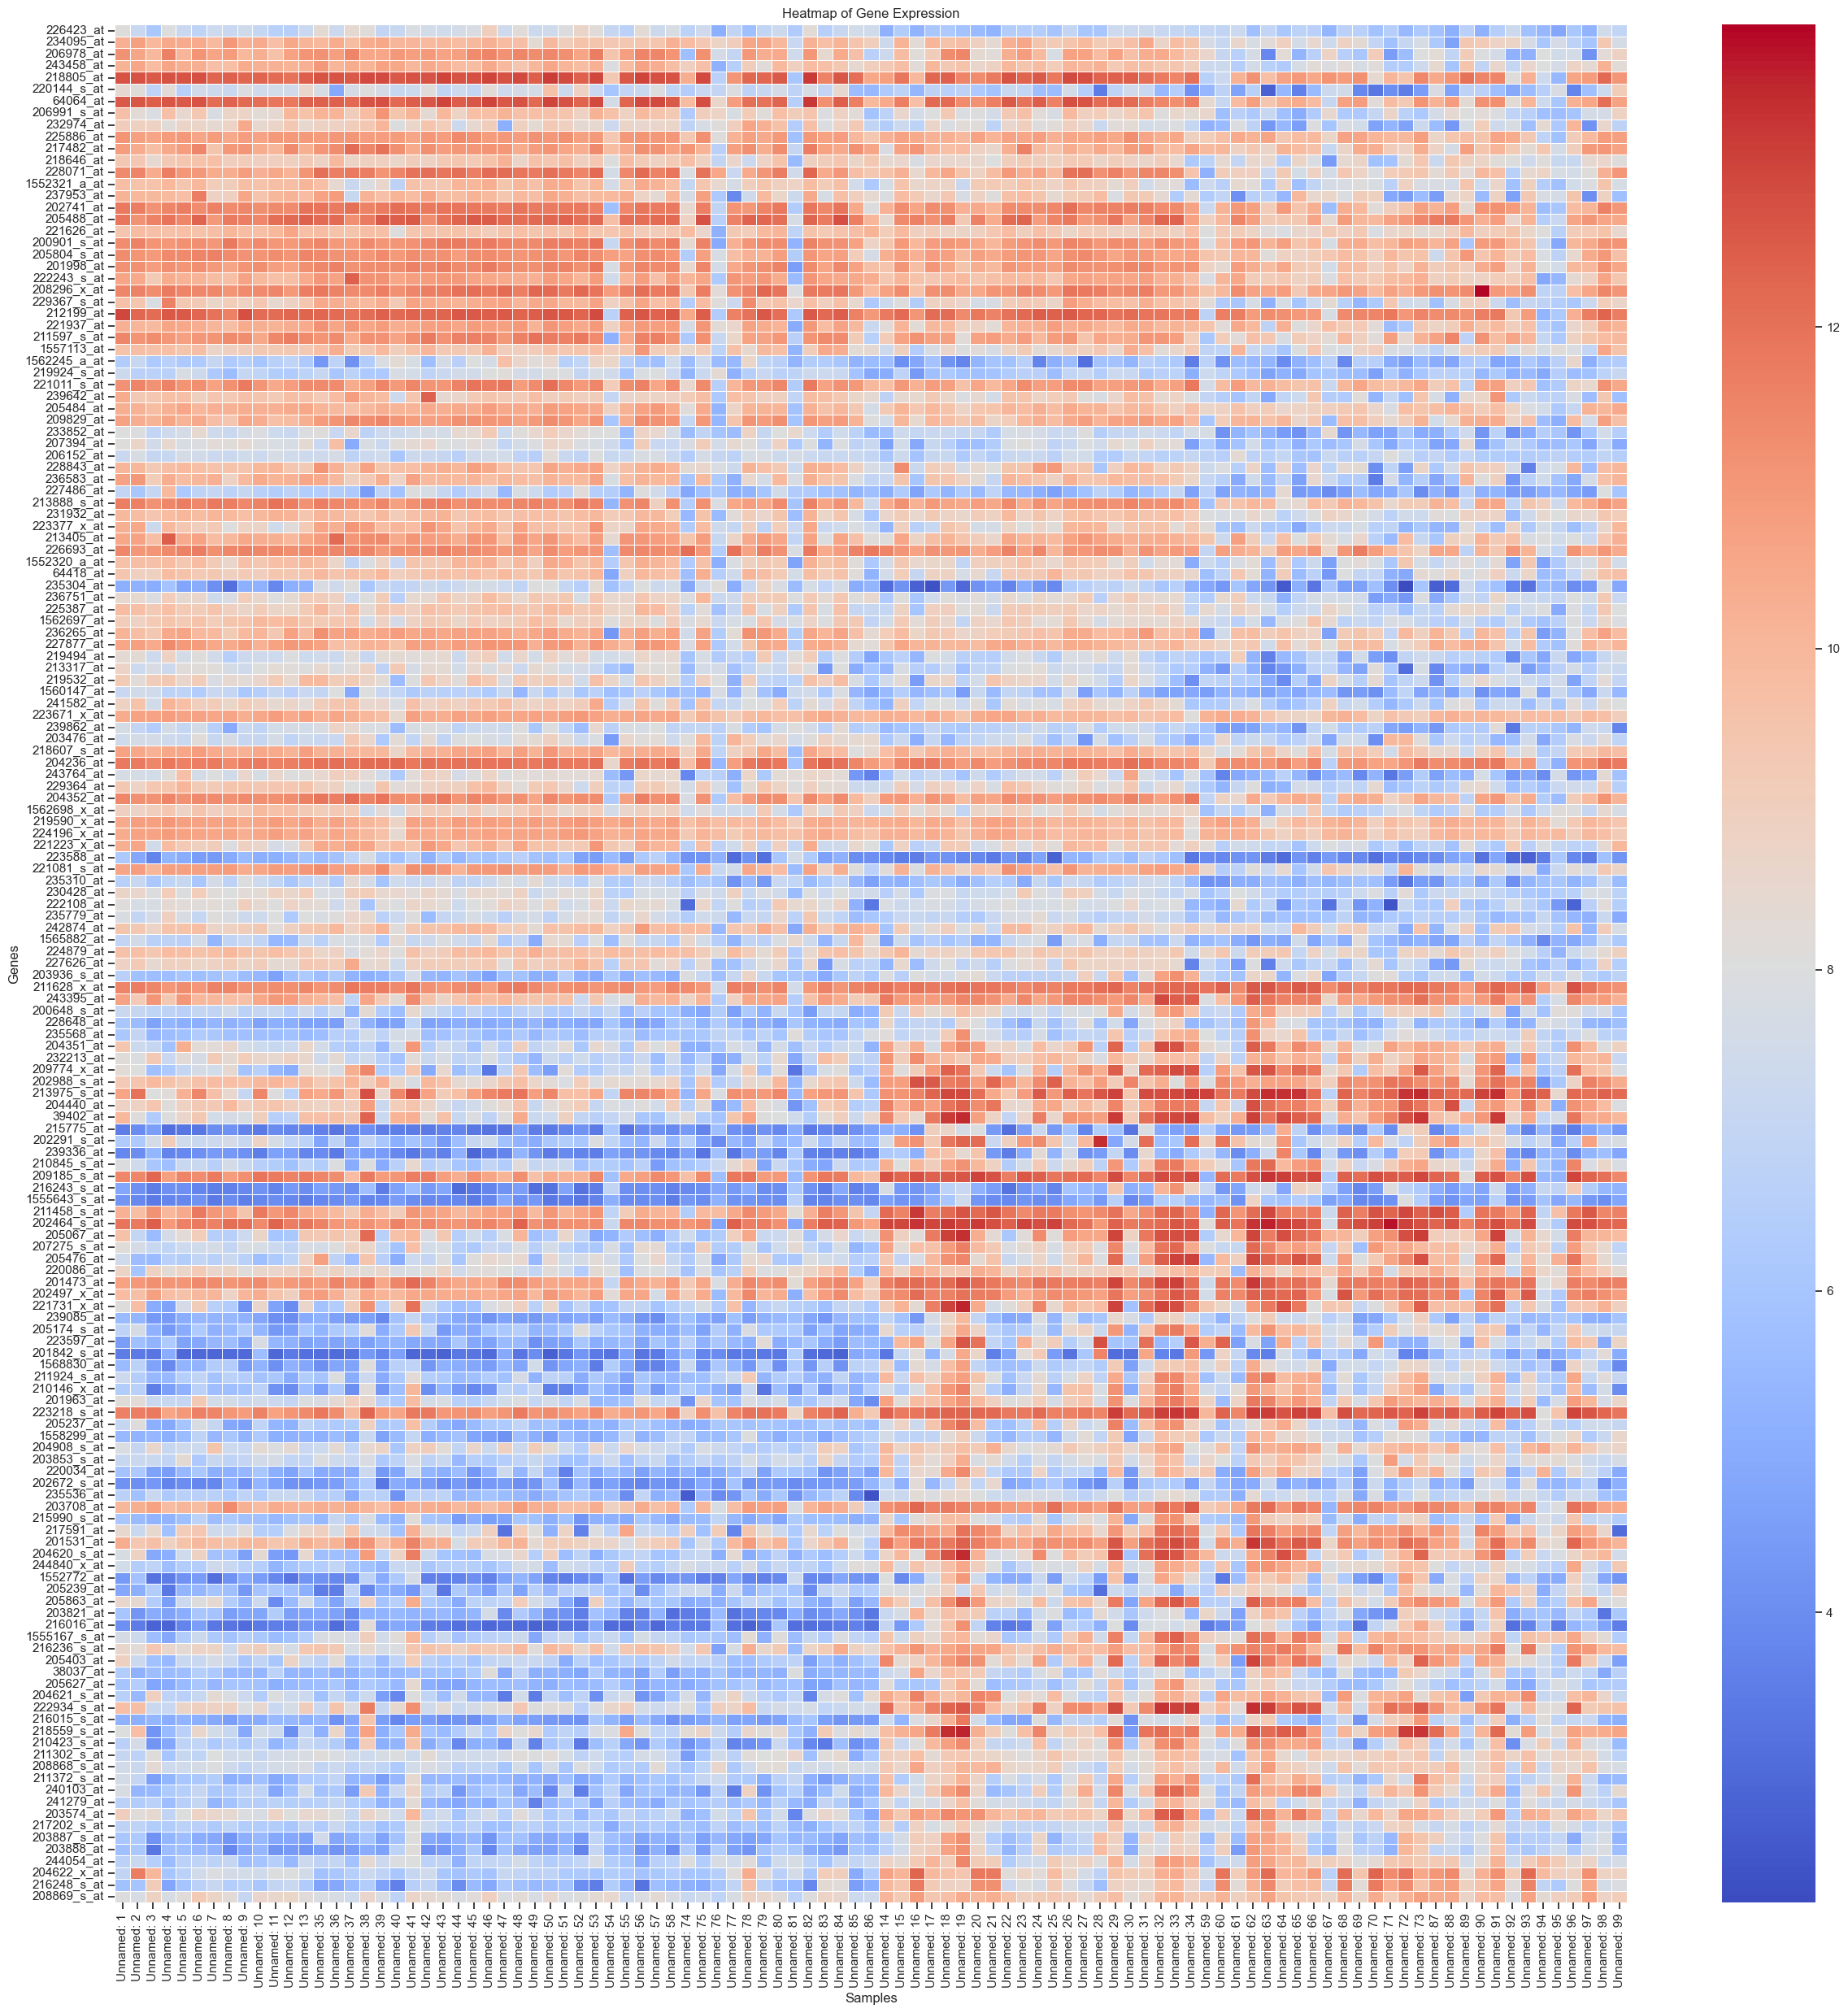

In [23]:
D_sorted_by_WRS = pd.concat([data_sorted_by_WRS.iloc[:80],data_sorted_by_WRS.iloc[-80:]])
M_columns = [col for col in D_sorted_by_WRS.columns if D_sorted_by_WRS.loc["Class", col] == 'M']
H_columns = [col for col in D_sorted_by_WRS.columns if D_sorted_by_WRS.loc["Class", col] == 'H']
sorted_columns = H_columns + M_columns
D_sorted_by_WRS = D_sorted_by_WRS[sorted_columns]

plt.figure(figsize=(30, 30))  
sns.heatmap(D_sorted_by_WRS.iloc[:-1].astype(float), cmap='coolwarm', linewidths=0.6, yticklabels=D_sorted_by_WRS.iloc[:-1].index)
plt.title('Heatmap of Gene Expression')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()